# Welcome to Week 3, Part 2 - Linear Regression
<hr/>

In our last workshop, we talked about taking some continuous data, such as features about houses, and clustering them into classes, such as neighborhoods. 

While these classes themselves can be represented continuously (by their centroids), the idea of classes is discrete. For example, if our features are _```square feet```_ and _```home value```_, when we examine our clusters, we may see that our _```downtown```_ centroid is ```[850, 925 000]```. These are continuous values; however, we have a set number of clusters in total (K of them!), making our output discrete.

Now, say we have some more continuous data, but we're looking for continuous output, as well. This is where you'll find linear regression to be useful.

## Breaking down the words

Just as "K-Means Clustering" sounded complicated, let's once again break down the terminology to understand the meaning of "Linear Regression."

### Linear

All this means is that the relationship between our variables, when plotted, will be in the form of a straight(ish!) line. Think back to _y = mx + b_. Not only is that a great example of a linear relationship, it's actually the only thing we're calculating (more on that later). You may see a linear relationship between variables like "time studied" and "course grade." 
 
This is in contrast to quadratic relationships _y = x<sup>2</sup>_, which may be seen between variables such as the height of a thrown ball, and the time after which it was thrown. Linear relationships can also take the form of _y = x<sup>3</sup>_, _y = x<sup>5</sup>_, and so on, though we won't be covering that today.


### Regression

This may be a word you haven't seen before - and that's okay! Normally, in school, a (very, very basic) question would ask you, 

>_"Given the equation y = 3x - 5, what is the value of y when x is 9?"_

However, we're going to flip this question around. Instead, we're now asking:

>_"Given this .csv full of x and y values, what is the equation for y = mx + b?_

The formal definition of regression, from a quick google search, is:

>"A return to a former or less developed state."

When you think about it, we're converting our data from many x and y values, to a _less developed_ state; an equation! That's essentially all regression is.

## How do I use it?

Let's just get this out of the way now.

![linreg](http://www.statisticshowto.com/wp-content/uploads/2009/11/linearregressionequations.bmp)
(From StatisticsHowTo.com)

Oof. That's ugly. There's a lot to go over here, so let's go step by step.

### a and b?

When calculating linear regression, convention is to use the form _y = ax + b_ rather than _y = mx + b_. Feel free to replace _a_ with any of the 21 other letters of the alphabet not in use in our equation, it's simply a placeholder. 

### What's wrong with that E? 

That's not a normal E; that's the Greek symbol Sigma, used to define _summation notation_. Aside from rhyming neatly, summation notation is useful because it lets us save a lot of time writing. Rather than writing x<sub>0</sub> + x<sub>1</sub> + <sub>2</sub> ... and so on, we can simply use Sigma to instruct us to take the sum of all x values.  You can actually think of the Sigma like a for loop: ```for x in our data: total = total + x```

![sigma](http://images.tutorvista.com/cms/images/67/sigma.jpg)
(From TutorVista.com)

### Seriously, why does this even work?

Asking "why" is always the right thing to do; it's always vital to understand what you're doing. However, an in-depth explanation of the linear regression formula involves some knowledge of calculus that we won't assume during these workshops. If you're interested in specifically what each term of the equation is doing, then I encourage you to check out [this PDF](http://coccweb.cocc.edu/srule/MTH244/other/LRJ.PDF) for a more involved explanation. For the purpose of not assuming everyone is fully proficient in calculus, though, we're going to stick to a more intuitive idea of why this formula works. 

#### The Line of Best Fit

Let's go back to _y = mx + b_ for a moment, our core concept. All our equation of a line represents is a line of best fit; the line that can most effectively represent - or, **estimate** - our data. But how do we define "representing our data?" The standard heuristic is to try to divide all of our points so that half are on one side of the line, and half are on the other. Does that best represent our data?

![lineofbestfit](http://www.bbc.co.uk/staticarchive/5932b02ab2c561a61cac4e6b45b23ba4b31be72b.gif)
(BBC)

Here we see some pretty linear data, and a line through it that looks like it pretty much divides our data evenly. How can we be sure, though, that this is best representing our data? What if we had some data whose line perfectly divided it in half, but one half was extremely close to the line, and one extremely far away? We need a mathematical way to understand "best fit."

#### Squared Error

We can think about representing our data as the idea that our line should be as close as possible to every single point. How, though, do we represent the distance from our line to each point? Well, at each x value, we could simply subtract our data's y value from the y value of our line (our **estimate**). Or, mathematically:

>Take the ordered pair (4, 16) and the line of best fit as f(x) = 3x+9. Calculate the error. <br/>
>f(4) = 3(4) + 9 = 21 <br/>
>y = 16 <br/>
>error = f(x) - y = 21 - 16 = 5

However, there's a problem with this method. Let's say we have three points in our dataset, and their errors are ```[-6, 2, 4]```. What if we wanted to ask, "What's the total amount our line is off by?" Presumably, we would add them up: -6 + 2 + 4 = ... zero! According to this, the total amount our line is off is absolutely 0, even though our points were off by -6, 2, and 4! This makes absolutely no sense.

To counteract this weird little quirk, then, we take the **squared error**. This is, quite literally, taking the error we just calculated and squaring it. We do this because now, whenever we encounter negative error, it will be multiplied by itself, forcing it to be positive. This means that when we add up our errors, it won't be able to sum to 0 anymore (cause there are no negative numbers). Let's try it:

>Errors: [-6, 2, 4] <br/>
>Sum of errors: -6 + 2 + 4 = 0 <br/>
>Squared errors: [36, 4, 16] <br/>
>Sum of squared errors: 36 + 4 + 16 = 56 

Much better. If you notice, this also has the effect of emphasizing larger error values. This can be both a good thing and a bad thing. 

#### Putting it all together 

So we know that our line of best fit should minimize the distance between each point and that line, and we also know that the way to define "distance" is by using squared error. So what we're really looking to do is **minimize the squared error.** How do we do that? Well, minimization is a concept you'll hear quite a lot about in calculus, but it's simply beyond the scope of this workshop. Following linear regression, however, I've included another component to this tutorial that not only gives us a way to do this with essentially zero calculus, it also builds on this idea of minimizing error to introduce some of the concepts that lay the foundation for many data science techniques used today. 

In summary, if you take anything away from this workshop, let it be that **the idea of linear regression is simply minimizing error to make our line of best fit as accurate as possible**. There are a number of ways you can define error beyond our squared error, but the concept remains the same.

## Can we get to programming already?

Sounds good to me.

<hr/>
## Programming Linear Regression

Let's import all of our usual packages, with something new from matplotlib called Axes3D - you'll see where that comes in.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')

For this tutorial, I've prepared some NBA data to use. Apologies if you're not a sports fan; sports are just useful for data analysis cause of how much data they have available (as well as being pretty straightforward to understand). 

Let's read in our data and take a look. 

**Legend** (ignore if you don't care about sports) <br/> <br/>
Team - Self-explanetory <br/>
GP - Games played <br/>
Win_pct - Percentage of games won <br/>
PD - Point differnetial (Points scored - points allowed) <br/>
PF - Points for (points scored) <br/>
PA - Points allowed <br/>
FG_pct - Field goal percentage (percentage of sucessful shot attempts) <br/>
3PM, 3PA, 3P_pct - three point shots made, attempted, percentage of successful attempts <br/>
AST_TO - A ratio of assists (player passes to his teammate, leading to a made shot) to turnovers (giveaways) <br/>
OREB_pct, DREB_pct - Offensive and defensive rebounding (collecting missed shots) percentages <br/>
PACE - Possessions (times a team has the ball) per game <br/> <br/>

Note: "O" prefixed to anything (aside from OREB_pct) denotes that the statistic is for opposing teams (ie OFG_pct being the opposition's average field goal percentage)

In [2]:
data = pd.read_csv('basketballdata.csv')
display(data.head(5))

,TEAM,GP,Win_pct,PD,PF,PA,FG_pct,OFG_pct,3PM,3PA,3P_pct,O3PM,O3PA,O3P_pct,AST_TO,OREB_pct,DREB_Pct,PACE
0,Golden State,9,0.667,8.3,120.0,111.7,0.523,0.446,13.4,32.9,0.409,11.3,30.7,0.370,1.79,0.251,0.733,103.33
1,Brooklyn,9,0.333,-5.0,114.3,119.3,0.436,0.474,11.2,33.0,0.340,10.3,26.9,0.384,1.40,0.219,0.766,109.26
2,Washington,8,0.500,2.6,113.5,110.9,0.461,0.477,10.0,27.5,0.364,9.6,27.8,0.347,1.65,0.247,0.759,103.22
3,Indiana,9,0.556,2.1,111.3,109.2,0.481,0.475,9.6,25.2,0.379,10.0,27.0,0.370,1.58,0.232,0.761,103.36
4,Orlando,9,0.667,4.7,111.3,106.6,0.480,0.447,12.4,29.6,0.421,8.4,27.6,0.306,1.53,0.188,0.754,104.66


## ADD A SCATTER MATRIX HERE OR SOMETHING

With sports, at the end of the day, we're usually trying to predict win percentage. And as we can see here, it seems that Point Differential does a nice job of that; the relationship looks pretty linear. So, we should be able to use Point Differential to predict win percentage - and we do that with a linear regression! 

Let's narrow our data to just what we care about; differential, and win percentage.

In [3]:
pred = data[['TEAM', 'PD','Win_pct']].copy()
display(pred.head(5))

,TEAM,PD,Win_pct
0,Golden State,8.3,0.667
1,Brooklyn,-5.0,0.333
2,Washington,2.6,0.500
3,Indiana,2.1,0.556
4,Orlando,4.7,0.667


Note that the following is technically unnecessary, but I find it helpful when doing linear regression by hand.

Going back to our original equation, we have 6 terms that we'll be using. I like to create a table of them for reference.

In [4]:
names = ['X', 'Y', 'XY', 'X^2', 'Y^2', 'N']
values = [np.sum(pred['PD']), np.sum(pred['Win_pct']), np.sum(pred['PD'] * pred['Win_pct']), np.sum(pred['PD']**2), np.sum(pred['Win_pct']**2), len(pred)]

pd.DataFrame(values, names)

,0
X,1.30000
Y,15.01000
XY,25.66280
X^2,1039.75000
Y^2,8.38251
N,30.00000


And with that, let's jump right in. We'll calculate our terms, and plug them into the formula. 

## COMMENT THIS CODE

In [5]:
def linear_regression(x, y):
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)

    x2_sum = np.sum(x**2)
    y2_sum = np.sum(y**2)

    n = len(x)

    x_avg = np.mean(x)
    y_avg = np.mean(y)
    
    m = (n*xy_sum - x_sum*y_sum) / (n*x2_sum - x_sum**2)
    b = y_avg - m * x_avg

    print("y =",m,"x +",b)
    
    r = (n*xy_sum - x_sum*y_sum) / sqrt((n*x2_sum - (x_sum**2))*(n*y2_sum - y_sum**2))
    r2 = r**2
    
    print("R: ", r, "\n R^2: ", r2)
    
    return (m*x + b), r, r2

y, r, r2 = linear_regression(pred['PD'], pred['Win_pct'])

y = 0.0240574387135185 x + 0.4992908443224143
R:  0.8304580711499571 
 R^2:  0.6896606079381071


## SHOW SCATTER PLOT WITH LINE OF BEST FIT

#### EXPLAIN R, R^2

# GRADIENT DESCENT STARTS HERE

<hr/>
<hr/>
<hr/>

In [6]:
x = pred['PD'][0]
y = pred['Win_pct'][0]

weight = 0.5

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

12.131289


In [7]:
weight = 1

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

58.262689


All numbers in [0.0, 0.05, 0.1, 0.15, 0.2]

In [8]:
x = pred['PD'][0]
y = pred['Win_pct'][0]

def predict(x, weight):
    return x*weight

for i in range(0, 5):
    weight = i/20
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print(i)
    print("Weight: ", str(weight), "\n", "Error: ",str(error))

0
Weight:  0.0 
 Error:  0.444889
1
Weight:  0.05 
 Error:  0.063504
2
Weight:  0.1 
 Error:  0.026569
3
Weight:  0.15 
 Error:  0.334084
4
Weight:  0.2 
 Error:  0.986049


Let's try it a bunch of times

In [9]:
for i in range(0, 5):
    weight = i/20
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print(i)
    print("Weight: ", str(weight), "\n", "Error: ",str(error))

0
Weight:  0.0 
 Error:  0.444889
1
Weight:  0.05 
 Error:  0.063504
2
Weight:  0.1 
 Error:  0.026569
3
Weight:  0.15 
 Error:  0.334084
4
Weight:  0.2 
 Error:  0.986049


Explain convergence, alpha

In [10]:
def basic_gradient_descent(x, y):
    weight = 0.5
    alpha = 0.05
    
    for i in range(0, 10):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        weight -= alpha*(hypothesis-y)
        print(i)
        print("Weight: ", str(weight), "\n", "Error: ",str(error))
        
basic_gradient_descent(x, y)

0
Weight:  0.32585 
 Error:  12.131289
1
Weight:  0.22397225 
 Error:  4.15163037803
2
Weight:  0.16437376625 
 Error:  1.42079170612
3
Weight:  0.129508653256 
 Error:  0.486230441627
4
Weight:  0.109112562155 
 Error:  0.166400212886
5
Weight:  0.0971808488606 
 Error:  0.0569463128548
6
Weight:  0.0902007965835 
 Error:  0.0194884519167
7
Weight:  0.0861174660013 
 Error:  0.00666943545721
8
Weight:  0.0837287176108 
 Error:  0.00228244754934
9
Weight:  0.0823312998023 
 Error:  0.000781110612574


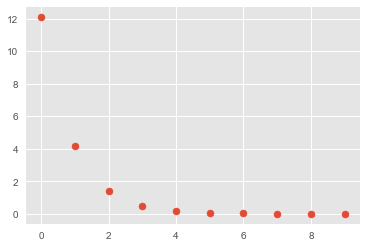

In [11]:
def basic_gradient_descent(x, y, iterations=10):
    weight = 0.5
    alpha = 0.05
    
    history = np.empty(2)
    for i in range(iterations):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        
        history = np.vstack([history,[i, error]])
        weight -= alpha*(hypothesis-y)
        
    return history[1:]
        
history = basic_gradient_descent(x, y)

plt.scatter(history[:,0], history[:,1])

This might be a good place to explain why you don't just iterate a million times

Adding in the intercept

y = -0.28415 x  + 0.71585
y = -0.16867025 x  + 0.83132975
y = -0.10688858375 x  + 0.89311141625
y = -0.0738353923062 x  + 0.926164607694
y = -0.0561519348838 x  + 0.943848065116
y = -0.0466912851629 x  + 0.953308714837
y = -0.0416298375621 x  + 0.958370162438
y = -0.0389219630957 x  + 0.961078036904
y = -0.0374732502562 x  + 0.962526749744
y = -0.0366981888871 x  + 0.963301811113


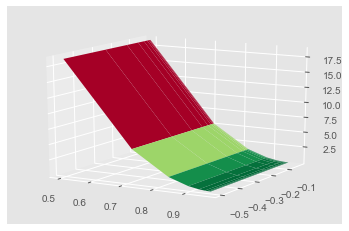

In [12]:
def basic_gradient_descent(x, y, iterations=10):
    x = [1, x]
    weights = [0.5, -0.5]
    alpha = 0.05
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        hypothesis = np.sum(np.dot(x, weights))
        error = (hypothesis - y) ** 2
        
        error_history.append(error)
        weight_history = np.vstack([weight_history, weights])
        
        for i in range(len(weights)):
            weights[i] -= alpha*(hypothesis-y) 
            
        print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(x, y, iterations=10)

def plot_error(weight_history, error_history, elev=15, azim=300):
    plotx, ploty = np.meshgrid(weight_history[:,0], weight_history[:,1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(plotx, ploty, error_history, cmap='RdYlGn_r')
    ax.view_init(elev=elev, azim=azim)
    
plot_error(weight_history, error_history)

Plot y=mx + b changes here

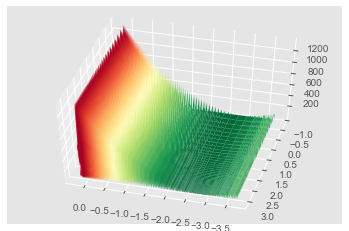

In [13]:
def basic_gradient_descent(x, y, iterations=10):
    x = [[1, i] for i in x]
    weights = [-3.7, -0.85] #(np.random.sample(2)+np.random.randint(-20,20,2)).tolist()
    alpha = 0.001
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error = (hypothesis - y[j]) ** 2

            error_history.append(error)
            weight_history = np.vstack([weight_history, weights])

            for k in range(len(weights)):
                weights[k] -= alpha*(hypothesis-y[j]) 
            #print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(pred['PD'], pred['Win_pct'], iterations=100)
#print(error_history)
plot_error(weight_history, error_history, elev=50, azim=105)

In [14]:
def compute_hypothesis(x, weights):
    return np.sum(np.dot(x, weights))

def compute_error(hypothesis, y):
    return (hypothesis-y)**2

def update_weights(weights, alpha, hypothesis, y):
    for i in range(len(weights)):
        weights[i] -= alpha*(hypothesis-y)
    return weights

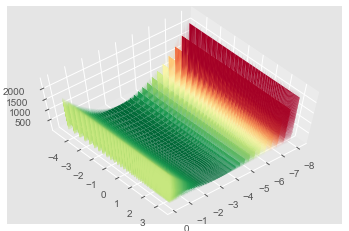

In [15]:
def gradient_descent(x, y, weights, alpha=0.001, iterations=100, elev=50, azim=105):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=elev, azim=azim)
    return weights, weight_history, error_history
        
#random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()

x = pred['PD']
y = pred['Win_pct']
input_weights = [-8.01, -4.6]
weights, weight_history, error_history = gradient_descent(x, y, input_weights, iterations=300, alpha=0.0003, elev=65, azim=50)

In [16]:
#test = data[['O3PM', 'OFG_pct', 'DREB_Pct']]

def feature_normalization(x):
    for feature in x:
        x[feature] = (x[feature]-np.mean(x[feature]))/(np.max(x[feature]) - np.min(x[feature]))
    return x

#x = feature_normalization(x.copy())

[0.024763569957115317, 0.83958073176126358, 114.47738962661735, 367.35215897785417, 52.897757063630159]


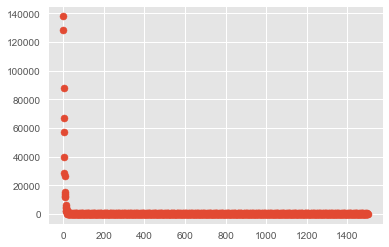

In [17]:
x = data[['O3PM', 'OFG_pct', 'PACE']]
y = data['PA']
features = len(x.loc[0])+1

def multiple_gradient_descent(x, y, weights, alpha=0.001, iterations=100):
    x.insert(0, 'X0', 1)
    
    weight_history = np.empty(len(x.loc[0]))+1
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x.loc[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    return weights, weight_history, error_history

weights = (np.random.sample(features)+np.random.randint(-5, 10,features)).tolist()
weights, weight_history, error_history = multiple_gradient_descent(x, y, weights, iterations=50, alpha=0.001)

plt.scatter(range(len(error_history)),error_history)
print(error_history[-5:])
#print(weight_history[-5:])
#print(weight_history[:5])

# BREAK
## BREAK
### BREAK

In [18]:
def compute_hypothesis(x, weights):
    return np.sum(np.dot(x, weights))

def compute_error(hypothesis, y):
    return (hypothesis-y)**2

def update_weights(weights, alpha, hypothesis, y,m):
    for i in range(len(weights)):
        weights[i] -= alpha*(hypothesis-y)*1/m
    return weights

Error [39.224619772130886, 4.9557944845696094, 0.69783994971923824]


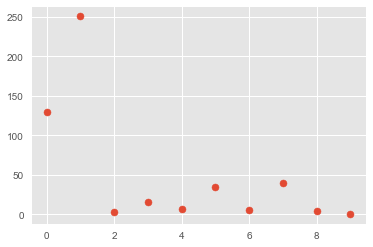

In [55]:
x = data[['O3PA', 'O3P_pct', 'OFG_pct', 'DREB_Pct', 'PACE']]
y = data['PA']
features = len(x.loc[0])+1

def multiple_gradient_descent(x, y, weights, alpha=0.001, iterations=100):
    x.insert(0, 'X0', 1)
    
    weight_history = np.empty(len(x.loc[0]))+1
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x.loc[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j], len(data))
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    plt.scatter(range(10),error_history[-10:])
    return weights, weight_history, error_history

#x = feature_normalization(x.copy())

#weights = (np.random.sample(features)+np.random.randint(-150, 150,features)).tolist() #[-106, 1.3, 145, 1.3]
weights = (np.random.sample(features).tolist())
weights, weight_history, error_history = multiple_gradient_descent(x, y, weights, iterations=200, alpha=0.000095)

print('Error', error_history[-3:])
#print('First 5', weight_history[:5])
#print('Last 5', weight_history[-5:])

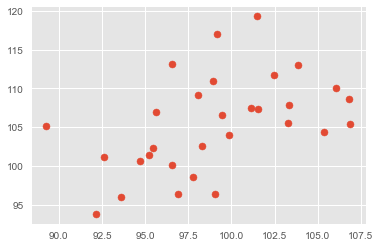

In [56]:
hypotheses = [compute_hypothesis(weights, x.loc[i].tolist()) for i in range(len(x))]

plt.scatter(hypotheses, y)

In [58]:
from sklearn.metrics import r2_score


test = data.copy()
test.insert(6, 'xPA', hypotheses)
print(r2_score(test['PA'], test['xPA']))
test


-0.928464138675


,TEAM,GP,Win_pct,PD,PF,PA,xPA,FG_pct,OFG_pct,3PM,3PA,3P_pct,O3PM,O3PA,O3P_pct,AST_TO,OREB_pct,DREB_Pct,PACE
0,Golden State,9,0.667,8.3,120.0,111.7,102.470898,0.523,0.446,13.4,32.9,0.409,11.3,30.7,0.370,1.79,0.251,0.733,103.33
1,Brooklyn,9,0.333,-5.0,114.3,119.3,101.485384,0.436,0.474,11.2,33.0,0.340,10.3,26.9,0.384,1.40,0.219,0.766,109.26
2,Washington,8,0.500,2.6,113.5,110.9,98.911963,0.461,0.477,10.0,27.5,0.364,9.6,27.8,0.347,1.65,0.247,0.759,103.22
3,Indiana,9,0.556,2.1,111.3,109.2,98.052226,0.481,0.475,9.6,25.2,0.379,10.0,27.0,0.370,1.58,0.232,0.761,103.36
4,Orlando,9,0.667,4.7,111.3,106.6,99.434365,0.480,0.447,12.4,29.6,0.421,8.4,27.6,0.306,1.53,0.188,0.754,104.66
5,Toronto,8,0.625,7.0,109.3,102.3,95.448726,0.465,0.453,10.1,32.3,0.314,8.8,25.8,0.340,1.53,0.222,0.778,101.52
6,LA Clippers,7,0.714,8.9,109.0,100.1,96.554630,0.453,0.430,11.6,29.6,0.391,9.4,27.4,0.344,1.45,0.263,0.771,100.16
7,Minnesota,8,0.625,-4.3,108.8,113.1,96.532468,0.467,0.508,8.5,22.8,0.374,9.5,27.0,0.352,1.35,0.251,0.744,100.84
8,Cleveland,9,0.444,-5.2,107.8,113.0,103.833477,0.476,0.477,10.2,29.9,0.342,13.7,32.9,0.416,1.32,0.200,0.781,100.85
9,Philadelphia,9,0.556,-0.9,107.7,108.6,106.785332,0.460,0.443,12.3,31.2,0.395,10.6,33.6,0.315,1.47,0.242,0.788,104.63


In [ ]:
print(weights)

# BREAK

9
Error [55.276208935966416, 27.509130347325268, 0.47549909525644996]


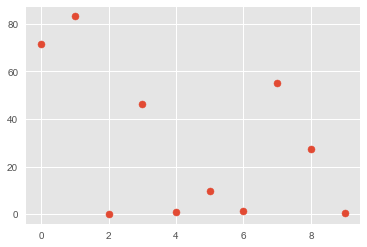

In [85]:
x = data[['O3PM', 'OFG_pct', 'PACE']]
y = data['PA']
features = len(x.loc[0])+1

def multiple_gradient_descent(x, y, weights, alpha=0.001, iterations=100, threshold=1):
    x.insert(0, 'X0', 1)
    
    weight_history = np.empty(len(x.loc[0]))+1
    error_history = []
    i = 0
    while True:
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x.loc[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j], 1)
            weight_history = np.vstack([weight_history, weights])
        i += 1
        if i == iterations or error_history[-1] < threshold:
            break
    print(i)
    weight_history = weight_history[1:]
    plt.scatter(range(10),error_history[-10:])
    return weights, weight_history, error_history

#x = feature_normalization(x.copy())

#weights = (np.random.sample(features)+np.random.randint(-150, 150,features)).tolist() #[-106, 1.3, 145, 1.3]
weights = (np.random.sample(features).tolist())
weights, weight_history, error_history = multiple_gradient_descent(x, y, weights, iterations=205, alpha=0.000095, threshold=0.9)

print('Error', error_history[-3:])
#print('First 5', weight_history[:5])
#print('Last 5', weight_history[-5:])

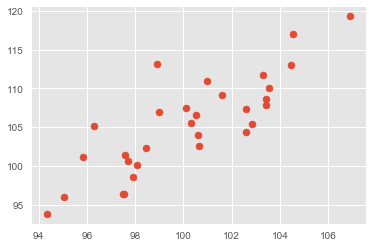

In [86]:
hypotheses = [compute_hypothesis(weights, x.loc[i].tolist()) for i in range(len(x))]

plt.scatter(hypotheses, y)

In [87]:
from sklearn.metrics import r2_score


test = data.copy()
test.insert(6, 'xPA', hypotheses)
print(r2_score(test['PA'], test['xPA']))
test

-0.145226670361


,TEAM,GP,Win_pct,PD,PF,PA,xPA,FG_pct,OFG_pct,3PM,3PA,3P_pct,O3PM,O3PA,O3P_pct,AST_TO,OREB_pct,DREB_Pct,PACE
0,Golden State,9,0.667,8.3,120.0,111.7,103.272303,0.523,0.446,13.4,32.9,0.409,11.3,30.7,0.370,1.79,0.251,0.733,103.33
1,Brooklyn,9,0.333,-5.0,114.3,119.3,106.911508,0.436,0.474,11.2,33.0,0.340,10.3,26.9,0.384,1.40,0.219,0.766,109.26
2,Washington,8,0.500,2.6,113.5,110.9,100.958466,0.461,0.477,10.0,27.5,0.364,9.6,27.8,0.347,1.65,0.247,0.759,103.22
3,Indiana,9,0.556,2.1,111.3,109.2,101.604940,0.481,0.475,9.6,25.2,0.379,10.0,27.0,0.370,1.58,0.232,0.761,103.36
4,Orlando,9,0.667,4.7,111.3,106.6,100.518128,0.480,0.447,12.4,29.6,0.421,8.4,27.6,0.306,1.53,0.188,0.754,104.66
5,Toronto,8,0.625,7.0,109.3,102.3,98.446603,0.465,0.453,10.1,32.3,0.314,8.8,25.8,0.340,1.53,0.222,0.778,101.52
6,LA Clippers,7,0.714,8.9,109.0,100.1,98.083345,0.453,0.430,11.6,29.6,0.391,9.4,27.4,0.344,1.45,0.263,0.771,100.16
7,Minnesota,8,0.625,-4.3,108.8,113.1,98.886896,0.467,0.508,8.5,22.8,0.374,9.5,27.0,0.352,1.35,0.251,0.744,100.84
8,Cleveland,9,0.444,-5.2,107.8,113.0,104.446837,0.476,0.477,10.2,29.9,0.342,13.7,32.9,0.416,1.32,0.200,0.781,100.85
9,Philadelphia,9,0.556,-0.9,107.7,108.6,103.417584,0.460,0.443,12.3,31.2,0.395,10.6,33.6,0.315,1.47,0.242,0.788,104.63
